In [1]:
!pip install qiskit

   ---------------------------------------- 0.0/7.8 MB ? eta -:--:--
   -- ------------------------------------- 0.5/7.8 MB 5.6 MB/s eta 0:00:02
   -------- ------------------------------- 1.6/7.8 MB 6.0 MB/s eta 0:00:02
   ---------------- ----------------------- 3.1/7.8 MB 6.0 MB/s eta 0:00:01
   -------------------- ------------------- 3.9/7.8 MB 6.2 MB/s eta 0:00:01
   ------------------------ --------------- 4.7/7.8 MB 4.8 MB/s eta 0:00:01
   -------------------------------- ------- 6.3/7.8 MB 5.4 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 5.7 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 5.7 MB/s eta 0:00:01
   ------------------------------------ --- 7.1/7.8 MB 5.7 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.8 MB 3.9 MB/s eta 0:00:01
   ---------------------------------------  7.6/7.8 MB 3.9 MB/s eta 0:00:01
   ----------------

In [2]:
import numpy as np
from numpy import sqrt
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

In [3]:
# Computational basis states
ket0 = np.array([1, 0])
ket1 = np.array([0, 1])

print("ket0 =", ket0)
print("ket1 =", ket1)

# Example: average of |0> and |1>
avg = (ket0 + ket1) / 2
print("Average vector:", avg)

ket0 = [1 0]
ket1 = [0 1]
Average vector: [0.5 0.5]


Conclusion: |0⟩ and |1⟩ states represented correctly. Averaging produced [0.5, 0.5].

Inference: Averaging doesn’t ensure normalization → not a valid quantum state until normalized.

In [4]:
# Define quantum states
u = Statevector([1/sqrt(2), 1/sqrt(2)])   # equal superposition
v = Statevector([sqrt(5)/3, sqrt(4)/3])   # custom state

# Draw in LaTeX form
display(u.draw('latex'))
display(v.draw('latex'))

# Check validity
print("Is u valid?", u.is_valid())
print("Is v valid?", v.is_valid())

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

Is u valid? True
Is v valid? True


Conclusion: Both |u⟩ = (|0⟩+|1⟩)/√2 and custom |v⟩ were valid normalized states.

Inference: Qiskit enforces quantum normalization (‖ψ‖ = 1).

In [5]:
# Perform measurement
result, new_state = u.measure()
print("Measurement result:", result)
print("State after measurement:", new_state)

Measurement result: 0
State after measurement: Statevector([1.+0.j, 0.+0.j],
            dims=(2,))


Conclusion: Measured |+⟩ once, got outcome 0, collapsing state to |0⟩.

Inference: Quantum measurement is probabilistic and collapses state irreversibly.

{np.str_('0'): np.int64(529), np.str_('1'): np.int64(471)}


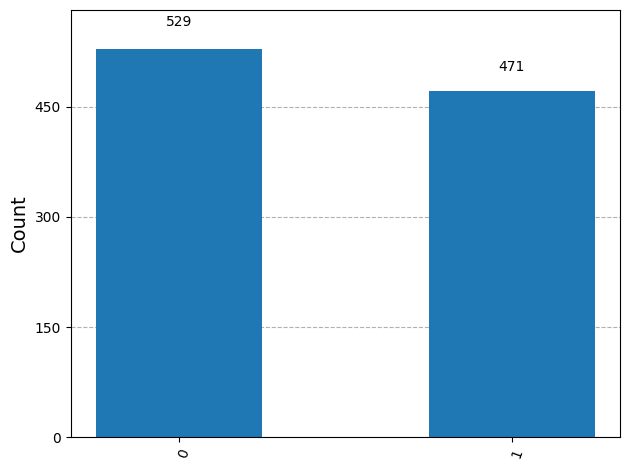

In [6]:
# Repeated measurements
counts = v.sample_counts(1000)
print(counts)
plot_histogram(counts)

In [7]:
# Perform measurement
result, new_state = u.measure()
print("Measurement result:", result)
print("State after measurement:", new_state)

Measurement result: 1
State after measurement: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


{np.str_('0'): np.int64(553), np.str_('1'): np.int64(447)}


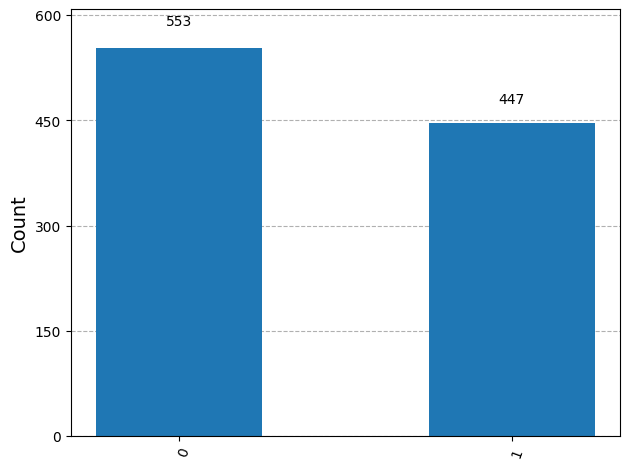

In [8]:
# Repeated measurements
counts = v.sample_counts(1000)
print(counts)
plot_histogram(counts)

In [9]:
# Perform measurement
result, new_state = u.measure()
print("Measurement result:", result)
print("State after measurement:", new_state)

Measurement result: 1
State after measurement: Statevector([0.+0.j, 1.+0.j],
            dims=(2,))


{np.str_('0'): np.int64(569), np.str_('1'): np.int64(431)}


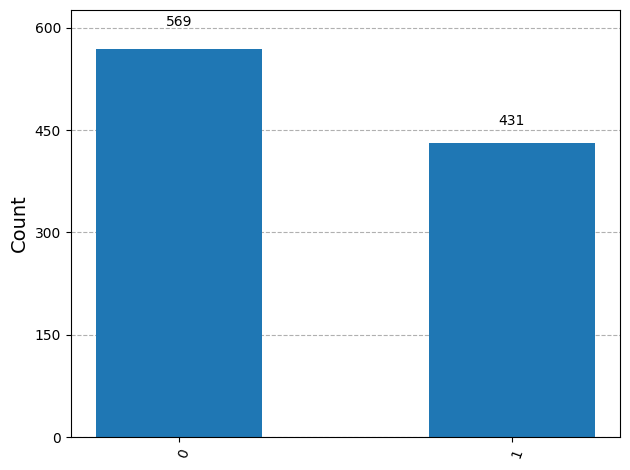

In [10]:
# Repeated measurements
counts = v.sample_counts(1000)
print(counts)
plot_histogram(counts)

<IPython.core.display.Latex object>

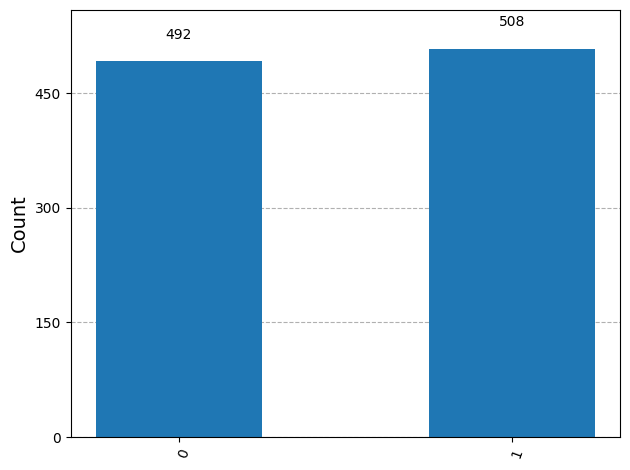

In [11]:
#Superposition State
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.visualization import plot_histogram

# Create circuit
qc = QuantumCircuit(1)
qc.h(0)

# Statevector
state = Statevector.from_instruction(qc)
display(state.draw('latex'))

# Sample measurement
counts = state.sample_counts(1000)
plot_histogram(counts)

<IPython.core.display.Latex object>

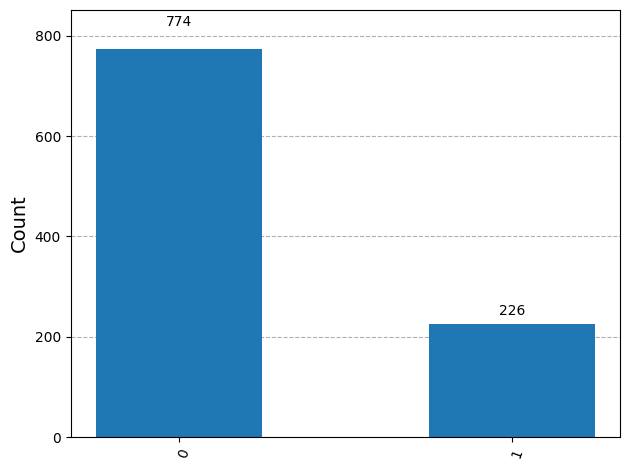

In [12]:
#Unequal Superposition
from numpy import sqrt
psi = Statevector([sqrt(3/4), sqrt(1/4)])
display(psi.draw('latex'))

counts = psi.sample_counts(1000)
plot_histogram(counts)

<IPython.core.display.Latex object>

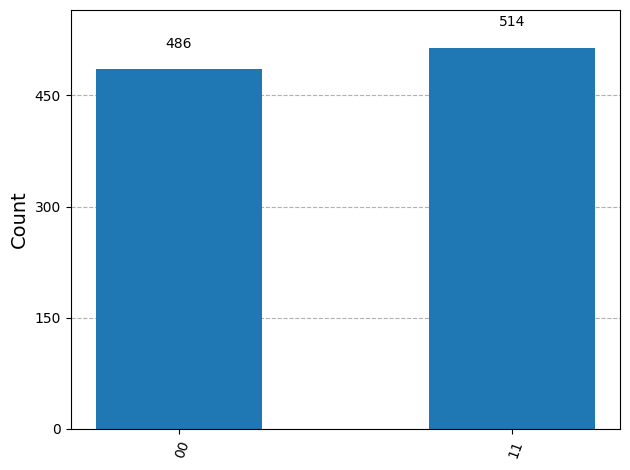

In [13]:
#Entangled Bell
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

state = Statevector.from_instruction(qc)
display(state.draw('latex'))

counts = state.sample_counts(1000)
plot_histogram(counts)

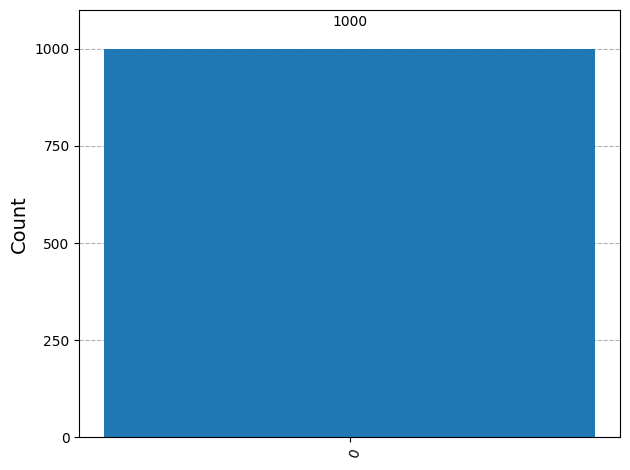

In [14]:
#Measurement in different bases
# State preparation
qc = QuantumCircuit(1)
qc.h(0)  # prepare |+>
state = Statevector.from_instruction(qc)

# Computational basis measurement
counts_comp = state.sample_counts(1000)
plot_histogram(counts_comp)

# X-basis measurement (apply H again before measurement)
qc2 = QuantumCircuit(1)
qc2.h(0)  # prepare |+>
qc2.h(0)  # switch measurement basis
state2 = Statevector.from_instruction(qc2)
counts_x = state2.sample_counts(1000)
plot_histogram(counts_x)